Code to create the main figure of the Alborex Data paper in ESSD journal.<br>
Only show the position of the deployments to keep things simple.

In [1]:
import os
import glob
import logging
import numpy as np
import netCDF4 as netcdf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import datetime, time, calendar
import matplotlib.text as text
from matplotlib.path import Path
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import alborexdata
import alborex_functions
from importlib import reload
#import pysocibclient
%matplotlib inline

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
reload(alborexdata)

<module 'alborexdata' from '/home/ctroupin/Publis/201703_AlborexData/python/alborexdata.py'>

# Configuration

## Flags for the plot

In [3]:
doplotsst, doplotvectors, doplotstream, doplotdrifters, doplotinset = 0, 0, 0, 1, 1

## Logger

In [4]:
logger = alborexdata.configure_logging()

## Regions of interest and box for the experiment

In [5]:
dlon, dlat = 1.0, 1.0
coordinates = [-6.75, 3.001, 34.75, 40.]
dlon2, dlat2 = .25, .25
coordinates2 = [-1, -0.25, 36.65, 37.25]
coordinates3 = [-6, -5.25, 35.8, 36.2]
res = 'i'

## Files and directories

### Coastline

In [6]:
coastdir = '../data/'
coastfile = os.path.join(coastdir, 'coastline_cartex_f.txt')
if os.path.exists(coastfile):
    logger.info("{0} exists".format(coastfile))
else:
    logger.warning("{0} does't exist".format(coastfile))   

2017-03-10 09:15:46,707 - alborex_logger - INFO - ../data/coastline_cartex_f.txt exists


### Glider

In [8]:
gliderdir = '/home/ctroupin/DataOceano/Alborex/Glider/'
gliderfile1 = os.path.join(gliderdir, 'dep0012_ideep00_ime-sldeep000_L1_2014-05-25_data_dt.nc')
gliderfile2 = os.path.join(gliderdir, 'dep0005_icoast00_ime-slcost000_L1_2014-05-25_data_dt.nc')
if os.path.exists(gliderfile1):
    logger.info("{0} exists".format(gliderfile1))
else:
    logger.warning("{0} does't exist".format(gliderfile1)) 
if os.path.exists(gliderfile2):
    logger.info("{0} exists".format(gliderfile2))
else:
    logger.warning("{0} does't exist".format(gliderfile2)) 

2017-03-10 09:17:19,453 - alborex_logger - INFO - /home/ctroupin/DataOceano/Alborex/Glider/dep0012_ideep00_ime-sldeep000_L1_2014-05-25_data_dt.nc exists
2017-03-10 09:17:19,455 - alborex_logger - INFO - /home/ctroupin/DataOceano/Alborex/Glider/dep0005_icoast00_ime-slcost000_L1_2014-05-25_data_dt.nc exists


### Need to get CTD file!

In [10]:
ctddir = '/home/ctroupin/DataOceano/Alborex/CTD/'
ctdfile = os.path.join(ctddir, 'dep0007_socib-rv_scb-sbe9002_L1_2014-05-25.nc')
if os.path.exists(ctdfile):
    logger.info("{0} exists".format(ctdfile))
else:
    logger.warning("{0} does't exist".format(ctdfile))

2017-03-10 09:27:58,520 - alborex_logger - INFO - /home/ctroupin/DataOceano/Alborex/CTD/dep0007_socib-rv_scb-sbe9002_L1_2014-05-25.nc exists


### Satellite data

In [21]:
sstdir = '/data_local/Satellite/MODIS/data/L2/Alborex/SST/NetCDF/'
sstfilelist = sorted(glob.glob(sstdir + 'A2014143020000*.nc'))
valex = 999.
altimetryfile = '/home/ctroupin/DataOceano/AVISO/MedSea/Aviso_gridded/Alborex/dt_med_allsat_madt_uv_20140523_20141010.nc'

### Figures

In [11]:
figdir = '../figures/'
figname = os.path.join(figdir, 'f01_AlborexData')

## Time interval for the drifters

In [26]:
tt = datetime.datetime(2014, 5, 25, 0, 0, 0)
tt_end = datetime.datetime(2014, 6, 4, 0, 0, 0)
time_min = int(tt.strftime('%s'))
time_max = int(tt_end.strftime('%s'))
time_init = '2014-05-25T000000'
time_end = '2014-05-26T000000'

## Colormap and other things related to pcolor

In [27]:
cmapsst = plt.cm.RdYlBu_r
# Min and max values
sstmin, sstmax = 16., 21.
normsst = colors.Normalize(vmin=sstmin, vmax=sstmax)
boundsst = np.arange(sstmin, sstmax + .001, 1.0)

# Load data

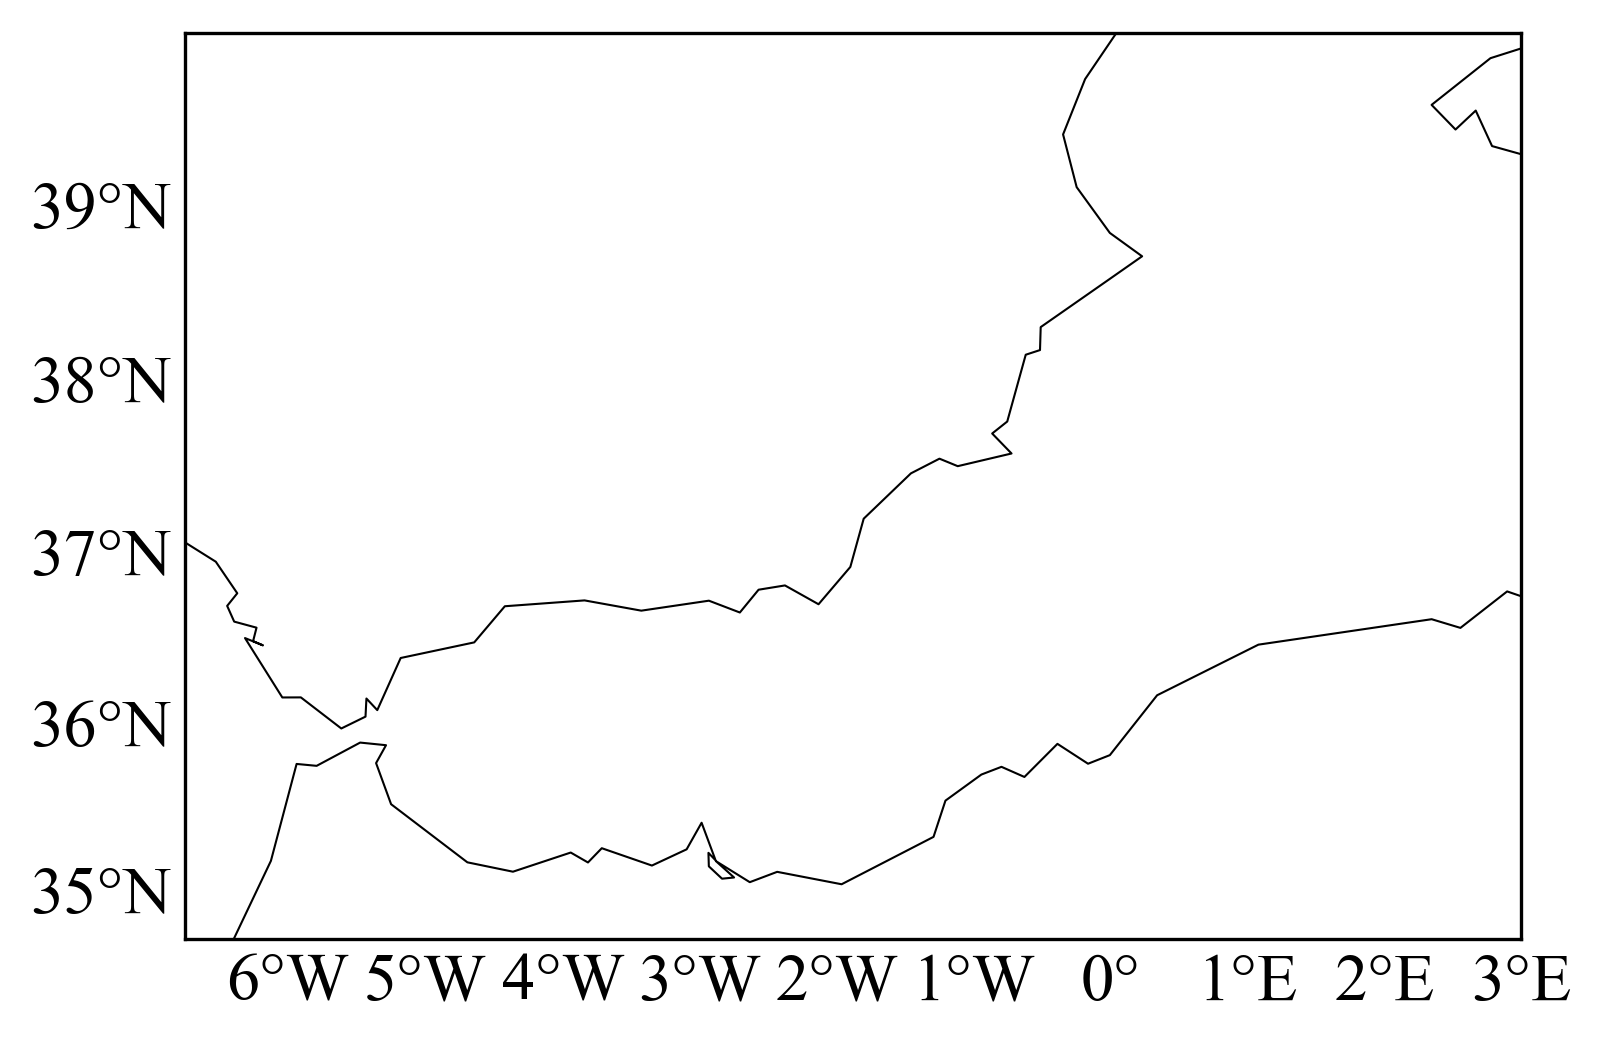

In [12]:
fig, m, ax = alborex_functions.prepare_map(coordinates, res='l')
alborexdata.add_map_grid(m, coordinates, dlon, dlat)
m.drawcoastlines(linewidth=0.5)
plt.savefig(os.path.join(figdir, 'f01_01.png'))
plt.show()
plt.close()

## Load coast

In [115]:
loncoast, latcoast = read_lonlat_coast(coastfile)

/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


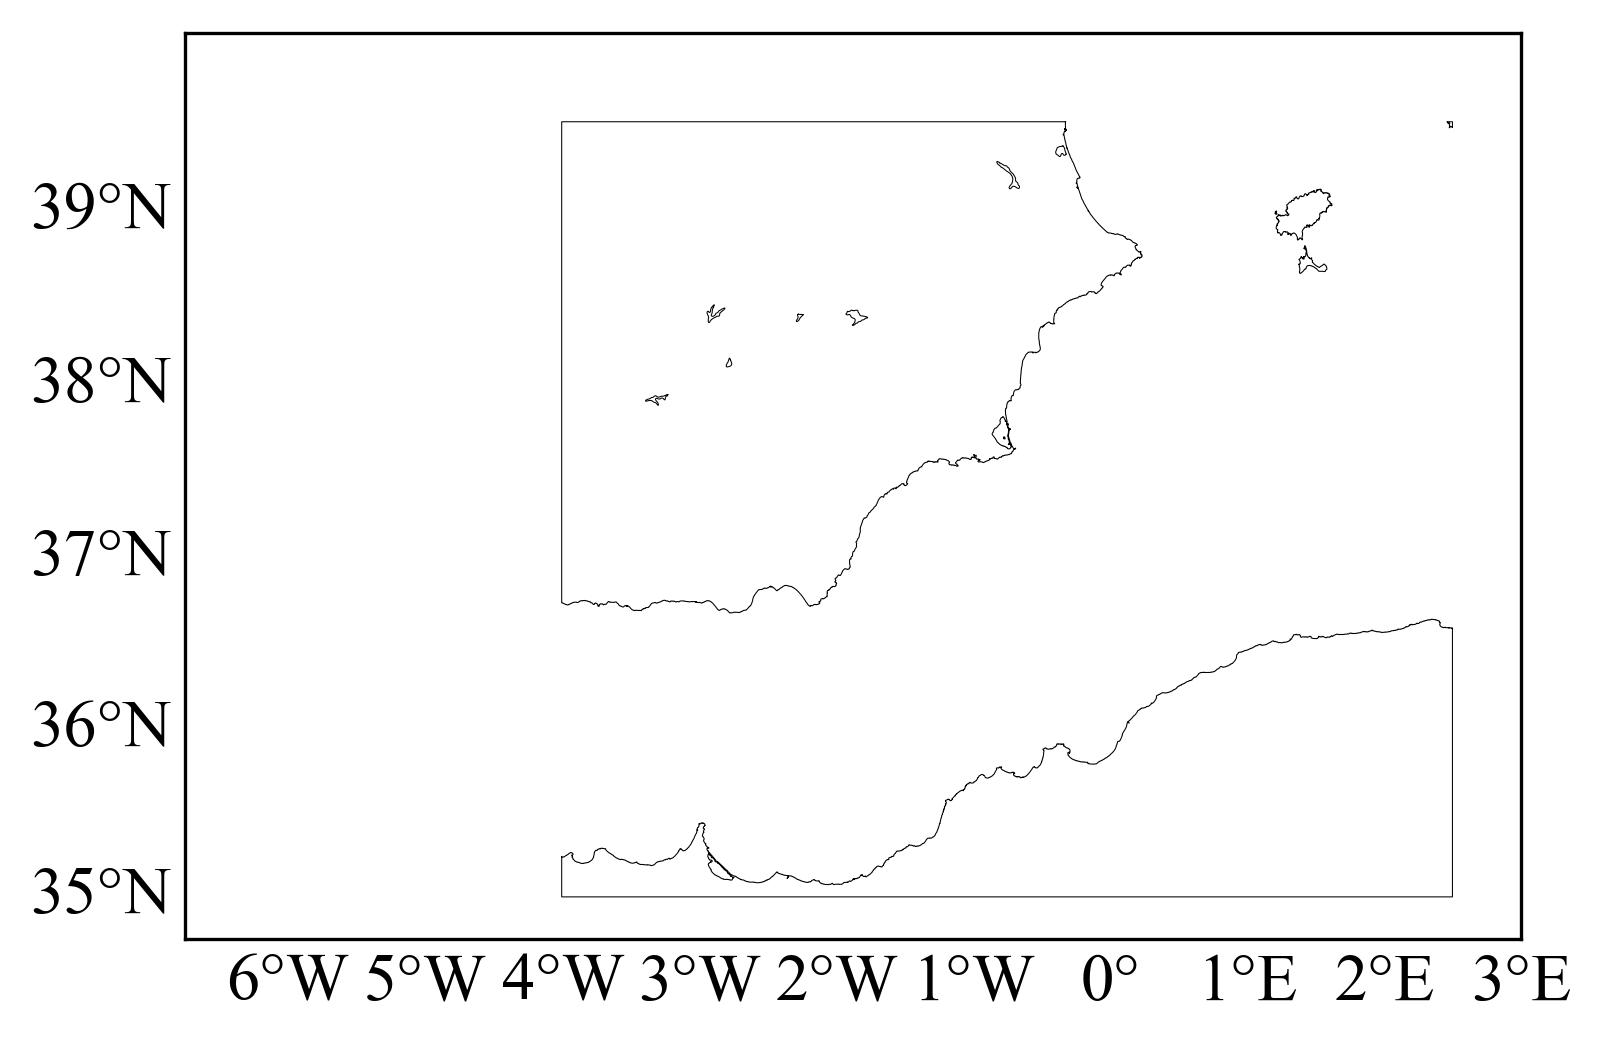

In [120]:
fig, m, ax = alborex_functions.prepare_map(coordinates, res='l')
for i in range(0, len(loncoast)):
    m.plot(np.array(loncoast[i]), np.array(latcoast[i]), color='k', linewidth=.25, latlon=True)
alborexdata.add_map_grid(m, coordinates, dlon, dlat)
plt.show()
plt.close()

## CTD

In [ ]:
lonCTD, latCTD, depthCTD, tempCTD, sstCTD = alborex_load_ctd(ctdfile)
logger.info("Loading CTD data")

In [69]:
lonCTD1, latCTD1 = load_lonloat_ctdleg("../data/ctd_positions_Leg1.txt")
lonCTD1, latCTD1 = m(lonCTD1, latCTD1)

/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4771: RuntimeWarning: invalid value encountered in greater
  lonsin = np.where(lonsin > lon_0+180, lonsin-360 ,lonsin)
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4772: RuntimeWarning: invalid value encountered in less
  lonsin = np.where(lonsin < lon_0-180, lonsin+360 ,lonsin)
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4776: RuntimeWarning: invalid value encountered in greater_equal
  itemindex = len(lonsin)-np.where(londiff>=thresh)[0]
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


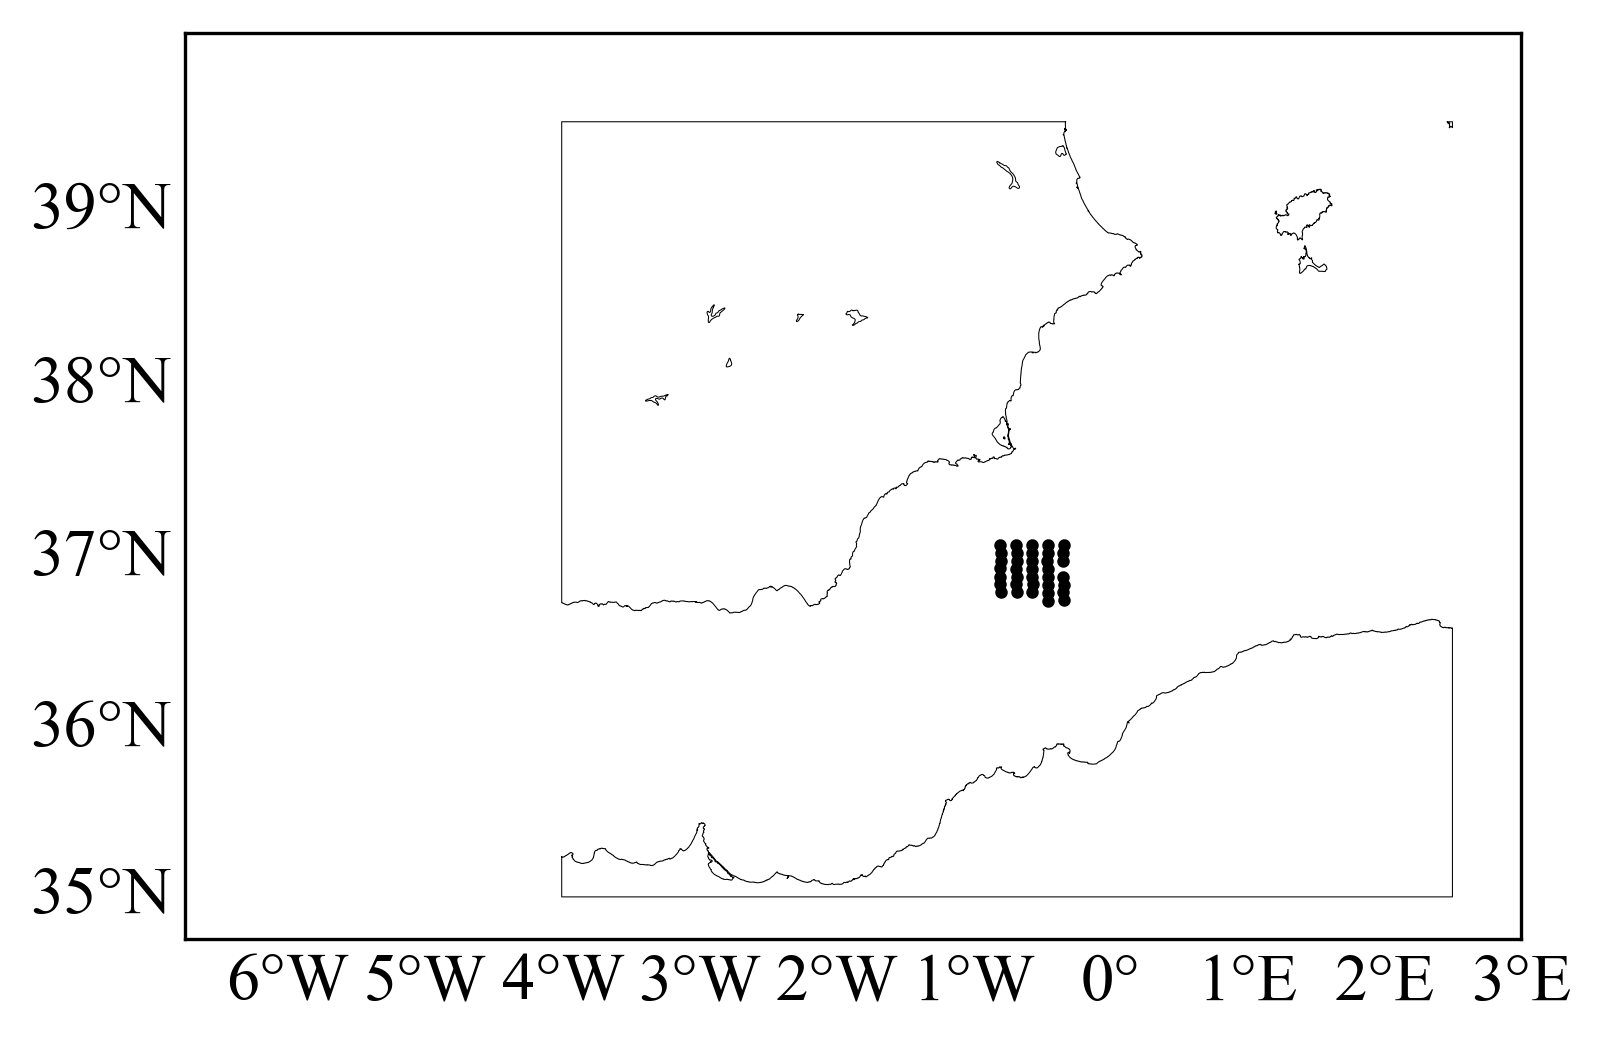

In [71]:
fig, m, ax = alborex_functions.prepare_map(coordinates, res='l')
alborexdata.add_map_grid(m, coordinates, dlon, dlat)
m.plot(loncoast, latcoast, linewidth=0.25, latlon=True)
m.plot(lonCTD1, latCTD1, 'ko', ms=1)
# plt.savefig(os.path.join(figdir, 'f01_03.png'))
plt.show()
plt.close()

In [66]:
latCTD1

[36.8,
 36.846,
 36.892,
 36.94,
 36.985,
 37.031,
 37.077,
 37.077,
 37.03,
 36.985,
 36.938,
 36.891,
 36.846,
 36.8,
 36.8,
 36.847,
 36.892,
 36.938,
 36.984,
 37.031,
 37.078,
 37.077,
 37.029,
 36.983,
 36.937,
 36.891,
 36.845,
 36.799,
 36.8,
 36.845,
 36.891,
 36.983,
 37.031,
 37.076,
 36.752,
 36.753]

## Glider

In [ ]:
longlider1, latglider1, depthglider1 = alborex_loadglider_coord(gliderfile1)
logger.info("Loading deep glider data")

longlider2, latglider2, depthglider1 = alborex_loadglider_coord(gliderfile2)
logger.info("Loading coastal glider data")

In [ ]:
# Generate lists of platforms
if doplotdrifters:
    socib_api = pysocibclient.ApiClient()
    drifterlist = socib_api.list_platforms(init_datetime=time_init, end_datetime=time_end,
                                           instrument_type="surface_drifter")
    logger.info("Generating list of drifter files")

In [ ]:
fig, m, ax = prepare_map(coordinates, res)
loncoast2, latcoast2 = m(loncoast, latcoast)
lonCTD, latCTD = m(lonCTD, latCTD)
longlider1, latglider1 = m(longlider1, latglider1)
longlider2, latglider2 = m(longlider2, latglider2)



m.drawmapscale(-0.45, 35.1, -0.25, 35.1, 100, barstyle='simple', units='km', fontsize=12, zorder=3)

# Labels
xtext, ytext = m(coordinates[1] - .1, coordinates[2] + .25)
#  plt.text(xtext, ytext, "AFRICA", va='center', ha='right',
# fontsize=18, bbox=dict(fc='w', ec="w", lw=0.5,alpha=0.8, pad=5.0))

xa1, ya1 = m(-2.5, 37.7)
ax.annotate("SPAIN", xy=(xa1,ya1), xytext=(xa1,ya1),
            xycoords='data', textcoords='data', fontsize=16
            )

xa1, ya1 = m(-6, 34.8)
xa2, ya2 = m(-6, 34.8)
ax.annotate("AFRICA", xy=(xa1,ya1), xytext=(xa2,ya2),
            xycoords='data', textcoords='data', fontsize=16
            )

xa1, ya1 = m(-3, 35.7)
xa2, ya2 = m(-3, 35.7)
ax.annotate("Alboran Sea", xy=(xa1,ya1), xytext=(xa2,ya2),
            xycoords='data', textcoords='data', fontsize=16,
            zorder=7
            )

# Add drifter trajectories on map
# -------------------------------
if doplotdrifters:

    londriftertotal, latdriftertotal, ndrifters = 0, 0, 0

    for drifter in drifterlist:
        drifter_opendap = drifter.product_list[-1].opendap
        if "2014-05-25" in drifter_opendap:
            with netcdf.Dataset(drifter_opendap) as nc:
                timedrifter = nc.variables['time'][:]
                goodtime = np.where((timedrifter > time_min) & (timedrifter < time_max))[0]
                londrifter = nc.variables['LON'][goodtime]
                latdrifter = nc.variables['LAT'][goodtime]
                londrifter, latdrifter = m(londrifter, latdrifter)
                m.plot(londrifter, latdrifter, 'ko', ms=0.1, alpha=.85, zorder=5)
                londriftertotal += londrifter[0]
                latdriftertotal += latdrifter[0]
                ndrifters += 1
    add_logo_on_map(driferlogo, ax, [londriftertotal / ndrifters, latdriftertotal / ndrifters], 0.1, zorder=6)

logger.info("Add rectangle for experiment")
patch = create_rect_patch(coordinates2, m, 0.1)
ax.add_patch(patch)
# and for Gibraltar
# patch = create_rect_patch(coordinates3, m, 0.2)
# ax.add_patch(patch)

# CTD and gliders
# m.plot(lonCTD,latCTD,'ko',ms=1, zorder=6)

# Coastline and continent
m.plot(loncoast2, latcoast2, 'k-', lw=0.1, zorder=4)
m.fillcontinents(ax=ax, color='0.9', zorder=2)

# plt.title(r"25$-$31 May, 2014", fontsize=20)

# Plot inset with CTD and gliders
if doplotinset:
    axins = zoomed_inset_axes(ax, 4.5, loc=2)
    n1, n2 = m(coordinates2[0], coordinates2[2])
    n3, n4 = m(coordinates2[1], coordinates2[3])
    axins.set_xlim(n1, n3)
    axins.set_ylim(n2, n4)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    # Add gliders tracks and CTD casts
    NN = 34

    axins.plot(lonCTD[:NN], latCTD[:NN], 'ks-', lw=0.5, color=".75", ms=5, zorder=2,
               label=r"CTD 1st leg ($\times$ 34)", alpha=.7)
    axins.plot(lonCTD[NN:], latCTD[NN:], 'kx-', lw=0.2, ms=2.5, zorder=2, label=r"CTD 2nd leg ($\times$ 28)",
               alpha=.7)

    axins.plot(longlider1, latglider1, '-', lw=3, color='k', label="Deep glider", zorder=3)
    axins.plot(longlider1, latglider1, '--', lw=3, color='.75', zorder=3)

    axins.plot(longlider2, latglider2, '-', lw=1.5, color='k', label="Coastal glider", zorder=4)
    axins.plot(longlider2, latglider2, '--', lw=1.5, color='.75', zorder=4)

    if doplotdrifters:
        axins.plot(londriftertotal / ndrifters, latdriftertotal / ndrifters, 'ko', ms=0.1,
                   label=r"Drifters ($\times$ 25)")
    if doplotsst:
        axins.pcolormesh(x, y, sst, cmap=cmapsst, norm=normsst, edgecolor='none')

    axins.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)

    add_logo_on_map(gliderlogo, axins, [longlider1[0], latglider1[0]], 0.1, zorder=6)
    add_logo_on_map(gliderlogo, axins, [longlider2[0], latglider2[0]], 0.1, zorder=6)

    mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")

plt.savefig(os.path.join(figdir, figname), dpi=300, facecolor='w', edgecolor='w',
            transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig(os.path.join(figdir, figname + '.eps'), dpi=300, facecolor='w', edgecolor='w',
            transparent=False, bbox_inches='tight', pad_inches=0.1)

# plt.show()
plt.close()